# Lab 3: Minimizing Cost

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

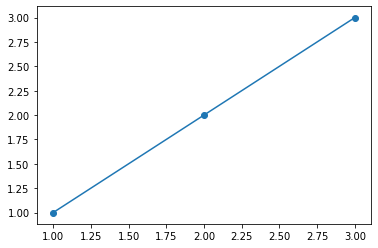

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)
plt.plot(xs, xs)

## Cost by W

$$ H(x) = Wx $$

In [5]:
W_l = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost_l.append(cost.item())

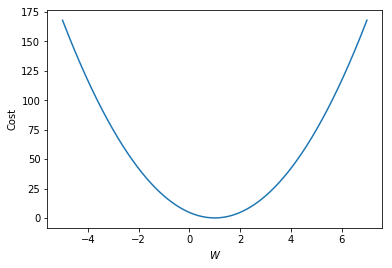

In [6]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

## Gradient Descent by Hand

In [7]:
W = 0

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

In [8]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


$$ W := W - \alpha \nabla W $$

In [9]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(1.4000)


## Training

In [10]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


## Training with `optim`

In [11]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
